In [18]:
%pylab inline
import numpy as np
import scipy as sc
import pandas as pd

import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("talk")
#rc('axes', labelsize=20, titlesize=20)

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy.stats as ss

import timeit
import pickle



Populating the interactive namespace from numpy and matplotlib


In [19]:
ABC_benchmark = pd.DataFrame(pickle.load( open( "data/ABC_benchmark_k_15_tol_0.01_num_20.p", "rb" ) ))
PMC_benchmark = pd.DataFrame(pickle.load( open( "data/PMC_benchmark_k_15_tol_0.01_num_20_T_4.p", "rb" ) ))
PMC_benchmark2 = pd.DataFrame(pickle.load( open( "data/Correct_PMC_benchmark2_k_15_tol_0.01_num_4_T_2_10.p", "rb" ) ))

In [20]:
#print(ABC_benchmark)
#print(PMC_benchmark)
print(PMC_benchmark2)

     T   niter   run_time  sample_size  times_1000_iter
0    2   14064   5.026632          100         0.377047
1    3    8283   2.877436          100         0.342956
2    4    6185   2.049685          100         0.347896
3    5    5611   2.074350          100         0.382012
4    6    5205   2.159832          100         0.420922
5    7    5281   1.886278          100         0.378036
6    8    5363   2.663233          100         0.543391
7    9    5384   2.543868          100         0.515064
8   10    5443   2.162925          100         0.433539
9    2   34689  11.564491          250         0.343202
10   3   20155   7.861551          250         0.398599
11   4   16036   7.500060          250         0.479704
12   5   14613   6.446822          250         0.445087
13   6   13346   6.501954          250         0.474830
14   7   13169   5.401312          250         0.428029
15   8   13284   6.009448          250         0.452666
16   9   13464   5.724597          250         0

[(0.89411765336990356, 0.10196078568696976, 0.10980392247438431), (0.21602460800432691, 0.49487120380588606, 0.71987698697576341), (0.30426760128900115, 0.68329106055054012, 0.29293349969620797), (0.60083047361934883, 0.30814303335021526, 0.63169552298153153), (1.0, 0.50591311045721465, 0.0031372549487095253), (0.99315647868549117, 0.9870049982678657, 0.19915417450315812)]


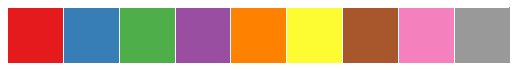

In [8]:
sns.set_palette("Set1")
sns.choose_colorbrewer_palette("qualitative")
print sns.color_palette()

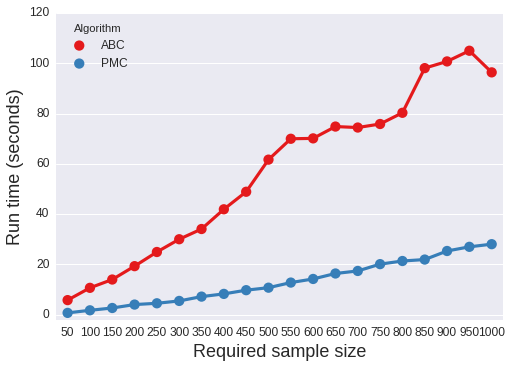

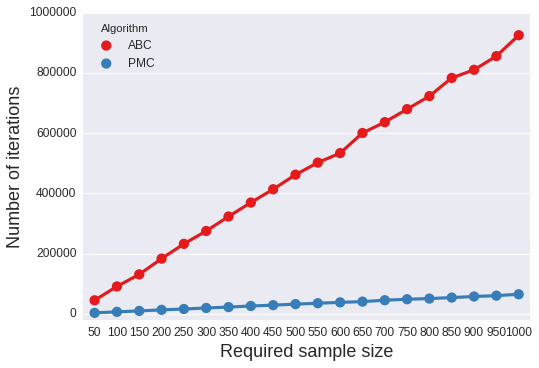

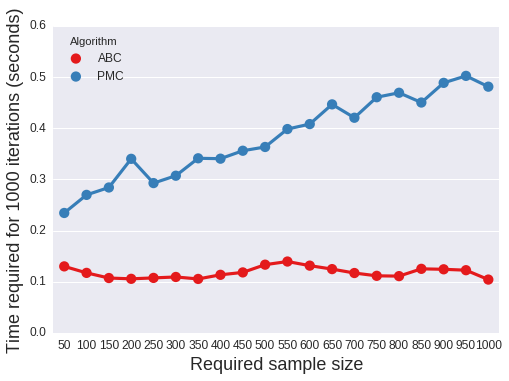

In [17]:
ABC_benchmark['Algorithm'] = 'ABC'
PMC_benchmark['Algorithm'] = 'PMC'
benchmark_df = ABC_benchmark.append(PMC_benchmark, ignore_index=True)
benchmark_df.sample_size = benchmark_df.sample_size.astype(int)

sns.set(font_scale=1.2)
'''
fig,ax = plt.subplots()

for alg,alg_df in benchmark_df.groupby("Algorithm"):
    sns.pointplot(x="sample_size", y="run_time", data=alg_df, label=alg, ax=ax)
'''

runtime_plot = sns.pointplot(x="sample_size", y="run_time", data=benchmark_df, hue="Algorithm", palette=sns.set_palette("Set1"))
#runtime_plot.set(xlabel='Sample size', ylabel='Run time (seconds)')
plt.xlabel('Required sample size', fontsize=18)
plt.ylabel('Run time (seconds)', fontsize=18)
plt.ylim(-2,)
plt.savefig('plots/ABC_PMC_Benchmark_runtime_noconfidence.pdf')
plt.show()

runtime_plot = sns.pointplot(x="sample_size", y="niter", data=benchmark_df, hue="Algorithm")
#runtime_plot.set(xlabel='Sample size', ylabel='Number of iterations')
plt.xlabel('Required sample size', fontsize=18)
plt.ylabel('Number of iterations', fontsize=18)
plt.ylim(-20000,)
plt.savefig('plots/ABC_PMC_Benchmark_niter_noconfidence.pdf')
plt.show()

runtime_plot = sns.pointplot(x="sample_size", y="times_1000_iter", data=benchmark_df, hue="Algorithm")
#runtime_plot.set(xlabel='Sample size', ylabel='Times required for 1000 iterations (seconds)')
plt.xlabel('Required sample size', fontsize=18)
plt.ylabel('Time required for 1000 iterations (seconds)', fontsize=18)
plt.ylim(0,)
plt.savefig('plots/ABC_PMC_Benchmark_timeiter_noconfidence.pdf')
plt.show()

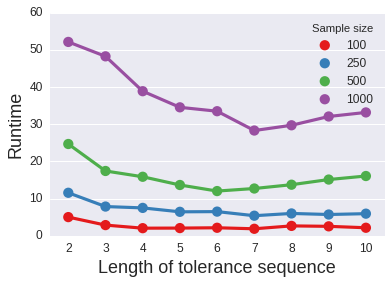

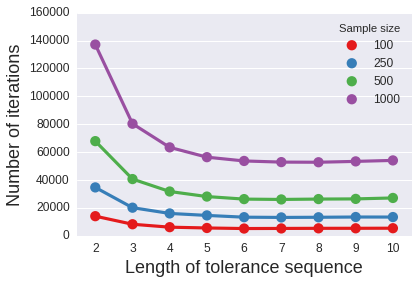

In [32]:
PMC_benchmark2 = PMC_benchmark2.rename(columns={'sample_size': 'Sample size'})
runtime_plot = sns.pointplot(x="T", y="run_time", data=PMC_benchmark2, hue="Sample size")
plt.xlabel('Length of tolerance sequence', fontsize=18)
plt.ylabel('Runtime', fontsize=18)
plt.ylim(0,)
plt.show()

runtime_plot = sns.pointplot(x="T", y="niter", data=PMC_benchmark2, hue="Sample size")
plt.xlabel('Length of tolerance sequence', fontsize=18)
plt.ylabel('Number of iterations', fontsize=18)
plt.ylim(0,)
plt.show()
